# Do the realistic lossy polymer wl study

We have 6 and 8 tube fibers. 8tube fiber we have a SEM image to show cladding, so I'll do that one.  We'll use 60 micrometers of polymer.  

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from ngsolve.webgui import Draw
from ngsolve import CF

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from scipy.optimize import newton

# Mode Profiles

In [375]:
n_air = 1.00027717
n_glass = 1.4388164768221814
n_poly = 1.5 - 2.4e-3

ts = [59.5e-6, 6e-6, 38.675e-6, 30.6e-6, 120e-6, 25.5e-6]
ns = [lambda x:n_air, lambda x:n_glass,
      lambda x:n_air, lambda x:n_glass,
      lambda x:n_poly, lambda x:n_air]

mats = ['air','glass','air','glass','polymer','air']
maxhs = [.2, .01, .2, .01, .01, 10]
scale = 59.5e-6
wl = 3.1e-6

In [376]:
A = BraggExact(ts=ts, ns=ns, mats=mats, maxhs=maxhs, scale=scale, wl=wl)


In [377]:
Draw(CF(list(A.ns)), A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [210]:
# k_low = A.k0 * A.ns[0] * A.scale
k_low, k_high = A.k0 * np.min(A.ns.real) * A.scale, A.k0 * np.max(A.ns.real) * A.scale

outer = 'h2'
Ktype = 'kappa'
nu = 1

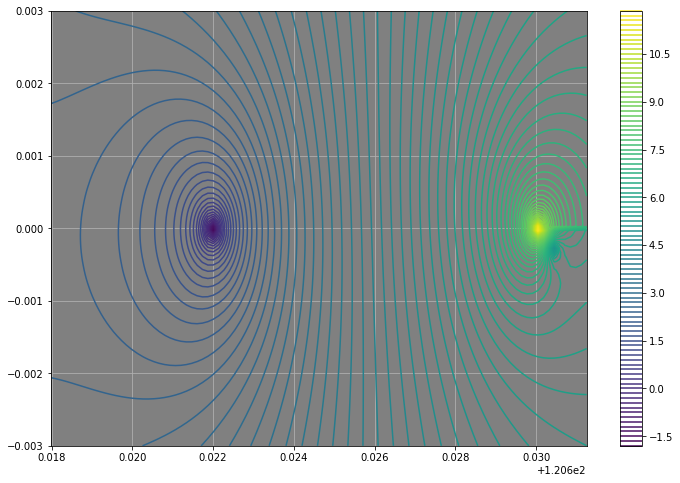

In [212]:
%matplotlib inline
plotlogf(A.determinant, .9999*k_low, 1.00001*k_low, -.003,.003, nu, outer,
         iref=100, rref=100, levels=100)

In [216]:
guess = np.array(.99995*k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer, Ktype), tol = 1e-16)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer, Ktype)))


Scaled beta:  (120.62199099683242-7.272301485852325e-06j) . Residual of determinant:  2.901871784778408e-11


In [199]:
Fs = A.all_fields(beta1, nu=nu, outer=outer, Ktype=Ktype)

In [378]:
Draw(10*Fs['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

# Wavelength Studies

## N2 reference fiber

In [332]:
n = 300
wls = np.linspace(3e-6, 4.2e-6, n+1)
betasN2 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

n_air = 1.00027717
n_glass = 1.4388164768221814

In [333]:
ts = [59.5e-6, 6e-6, 38.675e-6, 30.6e-6]
ns = [lambda x:n_air, lambda x:n_glass,
      lambda x:n_air, lambda x:n_glass]

mats = ['air','glass','air','glass']
maxhs = [.2, .1, .2, .1]
scale = 59.5e-6


In [334]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=wl, scale=scale,
                  no_mesh=True)
    k_low = A.ks[0] * A.scale
    guess = np.array(.99999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.99999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .99999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betasN2[i] = beta
    

     --------------------  1/301: wavelength: 3e-06  --------------------     

scaling guess: 1
Scaled beta:  (124.62660340268252-3.924318939856679e-06j) . Residual of determinant:  9.833193356058868e-13 


     --------------------  2/301: wavelength: 3.004e-06  --------------------     

Scaled beta:  (124.46052778243626-4.2868192610645774e-06j) . Residual of determinant:  2.0077571376149138e-12 


     --------------------  3/301: wavelength: 3.0080000000000003e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
Scaled beta:  (124.29488822942278-4.701010558530463e-06j) . Residual of determinant:  1.5589249970587764e-12 


     --------------------  4/301: wavelength: 3.012e-06  --------------------     

Scaled beta:  (124.12968225810795-5.176925854176633e-06j) . Residual of determinant:  8.682250341489221e-13 


     --------------------  5/301: wavelength: 3.016e-06  --------------------     

Scale

scaling guess: 1
scaling guess: 2
Scaled beta:  (118.92070711826199-1.6717821299835005e-05j) . Residual of determinant:  1.7654019952575817e-13 


     --------------------  38/301: wavelength: 3.148e-06  --------------------     

scaling guess: 1
Scaled beta:  (118.76930568609747-1.4640542645951113e-05j) . Residual of determinant:  6.600839698706477e-13 


     --------------------  39/301: wavelength: 3.152e-06  --------------------     

scaling guess: 1
Scaled beta:  (118.61832055253387-1.2936189620495088e-05j) . Residual of determinant:  4.3179332840326643e-13 


     --------------------  40/301: wavelength: 3.156e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (118.46774393681712-1.1521915420433679e-05j) . Residual of determinant:  1.4257562803480186e-12 


     --------------------  41/301: wavelength: 3.1600000000000002e-06  --------------------     

scaling guess: 1
Scaled beta:  (118.3175695771178-1.0336242032324454e-05j) . Residual of deter

Scaled beta:  (113.29431540862875-1.7305635767928635e-06j) . Residual of determinant:  3.40771302489921e-12 


     --------------------  77/301: wavelength: 3.304e-06  --------------------     

Scaled beta:  (113.15707656524802-1.6910563890251119e-06j) . Residual of determinant:  4.836254355138353e-12 


     --------------------  78/301: wavelength: 3.308e-06  --------------------     

Scaled beta:  (113.0201699985294-1.6538467525192716e-06j) . Residual of determinant:  1.3811509618619627e-11 


     --------------------  79/301: wavelength: 3.312e-06  --------------------     

scaling guess: 1
Scaled beta:  (112.88359447663122-1.6187791786188187e-06j) . Residual of determinant:  3.4278494894488172e-12 


     --------------------  80/301: wavelength: 3.316e-06  --------------------     

scaling guess: 1
Scaled beta:  (112.74734877564096-1.5857118257514602e-06j) . Residual of determinant:  1.2409854795835681e-11 


     --------------------  81/301: wavelength: 3.32e-06  --------

scaling guess: 2
Scaled beta:  (108.177524048754-1.116992397974243e-06j) . Residual of determinant:  1.685887083670566e-12 


     --------------------  116/301: wavelength: 3.46e-06  --------------------     

Scaled beta:  (108.052391998549-1.1149957318858618e-06j) . Residual of determinant:  2.51114605683022e-12 


     --------------------  117/301: wavelength: 3.4639999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (107.92754888839723-1.1134129492813867e-06j) . Residual of determinant:  4.77265845419924e-12 


     --------------------  118/301: wavelength: 3.468e-06  --------------------     

Scaled beta:  (107.80299371456927-1.1122371171633384e-06j) . Residual of determinant:  1.1583050202820642e-11 


     --------------------  119/301: wavelength: 3.472e-06  --------------------     

scaling guess: 1
Scaled beta:  (107.67872547805543-1.1114619782539015e-06j) . Residual of determinant:  1.5402232267589522e-12 


     --------------------  120/301: wa

scaling guess: 1
Scaled beta:  (103.38810902055393-1.3420332296761118e-06j) . Residual of determinant:  4.8821245886457e-12 


     --------------------  156/301: wavelength: 3.62e-06  --------------------     

scaling guess: 1
Scaled beta:  (103.27379545846951-1.3565057526349621e-06j) . Residual of determinant:  2.7911157694748793e-12 


     --------------------  157/301: wavelength: 3.624e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (103.15973406885996-1.371525849606548e-06j) . Residual of determinant:  2.6000157779222535e-12 


     --------------------  158/301: wavelength: 3.628e-06  --------------------     

Scaled beta:  (103.04592401390103-1.38710824818643e-06j) . Residual of determinant:  1.895598499433015e-12 


     --------------------  159/301: wavelength: 3.6319999999999997e-06  --------------------     

Scaled beta:  (102.93236445937988-1.4032684555432279e-06j) . Residual of determinant:  1.882599700161078e-11 


     --------------

Scaled beta:  (99.0042969453331-2.5995507451323354e-06j) . Residual of determinant:  6.501594055669815e-13 


     --------------------  196/301: wavelength: 3.78e-06  --------------------     

scaling guess: 1
Scaled beta:  (98.89945015008009-2.6605575138654236e-06j) . Residual of determinant:  2.5086446242338477e-12 


     --------------------  197/301: wavelength: 3.7839999999999997e-06  --------------------     

Scaled beta:  (98.79482457657431-2.724016257527115e-06j) . Residual of determinant:  7.608318575026828e-12 


     --------------------  198/301: wavelength: 3.788e-06  --------------------     

Scaled beta:  (98.69041951043653-2.79004884900532e-06j) . Residual of determinant:  4.2012147381655205e-12 


     --------------------  199/301: wavelength: 3.792e-06  --------------------     

Scaled beta:  (98.5862342396781-2.8587848353043404e-06j) . Residual of determinant:  2.6489797631899108e-12 


     --------------------  200/301: wavelength: 3.7959999999999997e-06  --

Scaled beta:  (94.97608986819246-9.60526624487151e-06j) . Residual of determinant:  7.97307607468208e-13 


     --------------------  236/301: wavelength: 3.9399999999999995e-06  --------------------     

Scaled beta:  (94.87955069893646-1.0062570834164527e-05j) . Residual of determinant:  2.117727229070998e-15 


     --------------------  237/301: wavelength: 3.944e-06  --------------------     

Scaled beta:  (94.78320502702435-1.0552187125493889e-05j) . Residual of determinant:  1.2765738068827557e-12 


     --------------------  238/301: wavelength: 3.948e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (94.68705211817327-1.1077118492910365e-05j) . Residual of determinant:  4.664743687864346e-13 


     --------------------  239/301: wavelength: 3.952e-06  --------------------     

Scaled beta:  (94.59109122835443-1.1640717630506564e-05j) . Residual of determinant:  2.2542143329299814e-12 


     --------------------  240/301: wavelength: 3.956e-

scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
Scaled beta:  (91.17921017343504-0.0032051647900598022j) . Residual of determinant:  2.0192412425676748e-16 


     --------------------  275/301: wavelength: 4.095999999999999e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
Scaled beta:  (91.25423494892178-0.00029998201348883637j) . Residual of determinant:  9.893400011746173e-15 


     --------------------  276/301: wavelength: 4.1e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
scaling guess: 17
scaling

<IPython.core.display.Javascript object>


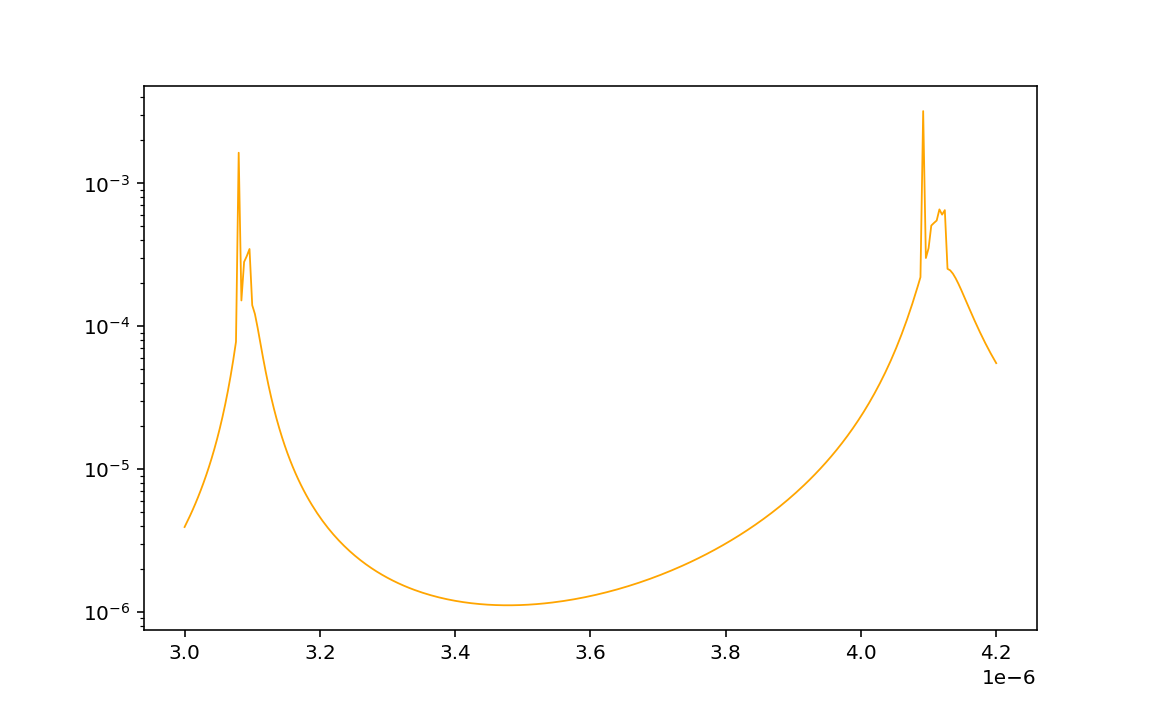

In [335]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betasN2.imag, color='orange', linewidth=.9)
plt.yscale('log')


# N3 Model

In [366]:
n = 300
betasN3 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

n_air = 1.00027717
n_glass = 1.4388164768221814


In [367]:
ts = [59.5e-6, 6e-6, 38.675e-6, 90.6e-6, 25.5e-6]
ns = [lambda x:n_air, lambda x:n_glass,
      lambda x:n_air, lambda x:n_glass,
      lambda x:n_air]

mats = ['air','glass','air','glass','air']
maxhs = [.2, .01, .2, .01, 10]
scale = 59.5e-6


Having a hard time getting the fundamental, it's jumping to a higher order mode, let's look where it is.

In [368]:
A = BraggExact(ts=ts, ns=ns , mats=mats, maxhs=maxhs, wl=wls[0], scale=scale,
              no_mesh=True)

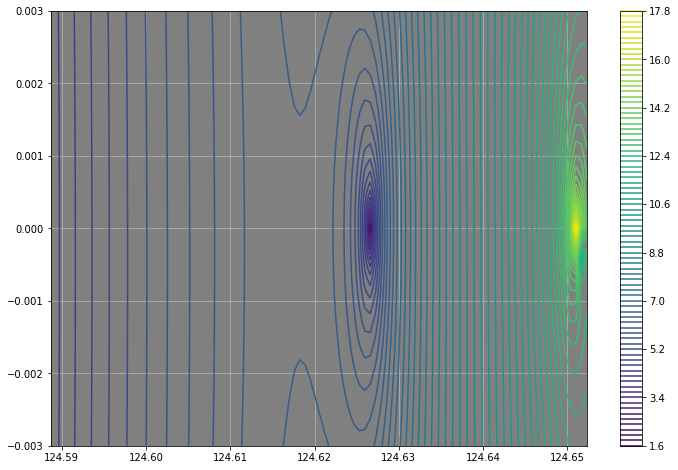

In [369]:
%matplotlib inline
k_low = A.ks[0] * A.scale

plotlogf(A.determinant, .9995*k_low, 1.00001*k_low, -.003,.003, nu, outer,
         iref=100, rref=100, levels=100)

Lower than I thought, okay

In [370]:
guess = np.array(.9998*k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer, Ktype), tol = 1e-16)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer, Ktype)))


Scaled beta:  (124.6266031285135-1.4579324042249226e-07j) . Residual of determinant:  2.505316406943557e-10


In [371]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats, maxhs=maxhs, wl=wl, scale=scale,
                  no_mesh=True)
    k_low = A.ks[0] * A.scale
    guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betasN3[i] = beta
    

     --------------------  1/301: wavelength: 3e-06  --------------------     

Scaled beta:  (124.6266031285135-1.4579324041229732e-07j) . Residual of determinant:  2.511976989474171e-10 


     --------------------  2/301: wavelength: 3.004e-06  --------------------     

Scaled beta:  (124.46052631096973-1.7778326576028865e-07j) . Residual of determinant:  8.005853689556704e-10 


     --------------------  3/301: wavelength: 3.0080000000000003e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (124.29488507653393-2.538898942725341e-07j) . Residual of determinant:  8.845254417890732e-10 


     --------------------  4/301: wavelength: 3.012e-06  --------------------     

Scaled beta:  (124.12967636498651-4.4505712608152024e-07j) . Residual of determinant:  1.1216497184239562e-11 


     --------------------  5/301: wavelength: 3.016e-06  --------------------     

Scaled beta:  (123.96489577942786-1.0853514005499856e-06

scaling guess: 2
Scaled beta:  (118.76930756055033-5.193284162451214e-07j) . Residual of determinant:  2.488275146037487e-09 


     --------------------  39/301: wavelength: 3.152e-06  --------------------     

scaling guess: 1
Scaled beta:  (118.61831913202933-4.603681945854111e-07j) . Residual of determinant:  5.984953385087784e-11 


     --------------------  40/301: wavelength: 3.156e-06  --------------------     

Scaled beta:  (118.46773978959446-4.6080745226705925e-07j) . Residual of determinant:  7.220798757148081e-10 


     --------------------  41/301: wavelength: 3.1600000000000002e-06  --------------------     

Scaled beta:  (118.31756279022288-5.272089587404296e-07j) . Residual of determinant:  1.6354088185390474e-09 


     --------------------  42/301: wavelength: 3.164e-06  --------------------     

Scaled beta:  (118.16778239051604-7.130930812730616e-07j) . Residual of determinant:  8.614043891978331e-11 


     --------------------  43/301: wavelength: 3.168e-06

scaling guess: 1
Scaled beta:  (113.15707806181156-1.172205905935626e-07j) . Residual of determinant:  2.5199677891093405e-09 


     --------------------  78/301: wavelength: 3.308e-06  --------------------     

scaling guess: 1
Scaled beta:  (113.020170922619-8.44950490713795e-08j) . Residual of determinant:  5.811806357148381e-10 


     --------------------  79/301: wavelength: 3.312e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (112.88359496857765-6.897162256658779e-08j) . Residual of determinant:  2.631396282663501e-09 


     --------------------  80/301: wavelength: 3.316e-06  --------------------     

Scaled beta:  (112.74734890435812-6.237832088721811e-08j) . Residual of determinant:  4.714300230100838e-10 


     --------------------  81/301: wavelength: 3.32e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (112.61143147210967-6.195738808086398e-08j) . Residual of determinant:  5.563317038424

Scaled beta:  (108.17752284091642-1.001086564984261e-07j) . Residual of determinant:  2.637867834136623e-09 


     --------------------  116/301: wavelength: 3.46e-06  --------------------     

Scaled beta:  (108.05239018163849-1.6925727673003736e-07j) . Residual of determinant:  9.961632622946712e-10 


     --------------------  117/301: wavelength: 3.4639999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (107.92754589316021-3.8540651396757946e-07j) . Residual of determinant:  9.611185748382374e-10 


     --------------------  118/301: wavelength: 3.468e-06  --------------------     

Scaled beta:  (107.80298709792419-1.8156038728103502e-06j) . Residual of determinant:  2.2317253354095678e-10 


     --------------------  119/301: wavelength: 3.472e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (107.67873945708995-1.3957704295776544e-05j) . Residual of determinant:  1.6722961420729823e-11 


     ----------

scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
scaling guess: 17
Scaled beta:  (103.73255708642323-1.7771112004330737e-05j) . Residual of determinant:  7.832831786502351e-12 


     --------------------  153/301: wavelength: 3.608e-06  --------------------     

Scaled beta:  (103.6175041957788-2.4002450141470326e-06j) . Residual of determinant:  6.837174447708475e-11 


     --------------------  154/301: wavelength: 3.612e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (103.50267942950019-5.418842342264104e-07j) . Residual of determinant:  1.4781232656943764e-10 


     --------------------  155/301: wavelength: 3.6159999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (103.38811141016139-2.433312322681451e-07j) . Residual of determinant:  1.3080853505573584e-09 


     --------------------  156/301: wavelength: 3.62e

scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
scaling guess: 17
scaling guess: 18
scaling guess: 19
Scaled beta:  (99.74445567486359-2.5447178655512678e-05j) . Residual of determinant:  2.2759367072969905e-12 


     --------------------  189/301: wavelength: 3.752e-06  --------------------     

Scaled beta:  (99.6380797417171-5.780710995867665e-06j) . Residual of determinant:  2.8614286661270264e-11 


     --------------------  190/301: wavelength: 3.7559999999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (99.5318819707699-1.23545590745208e-06j) . Residual of determinant:  1.194650164173712e-10 


     --------------------  191/301: wavelength: 3.7599999999999996e-06  --------------------     

Scaled beta:  (99.42591547790565-5.439114462860627e-07j) . Residual of determinant:  1.0862686906817918e-09 


     --------------------  192/301: wavelength: 3.764e-06  --------------------     

Scaled beta:  (99.3201751869

scaling guess: 2
scaling guess: 3
Scaled beta:  (95.779490248511-0.011639584260352637j) . Residual of determinant:  7.251866290406125e-12 


     --------------------  228/301: wavelength: 3.908e-06  --------------------     

scaling guess: 1
Scaled beta:  (95.65739860969364-2.568938583933209e-05j) . Residual of determinant:  7.300116411678806e-12 


     --------------------  229/301: wavelength: 3.912e-06  --------------------     

Scaled beta:  (95.55945558064658-5.2428686362704495e-06j) . Residual of determinant:  2.396186098065434e-11 


     --------------------  230/301: wavelength: 3.9159999999999994e-06  --------------------     

scaling guess: 1
Scaled beta:  (95.46173074295247-2.2814997612703322e-06j) . Residual of determinant:  2.092551734603061e-11 


     --------------------  231/301: wavelength: 3.92e-06  --------------------     

Scaled beta:  (95.36420851164178-1.3426677984963424e-06j) . Residual of determinant:  2.3598876690438753e-10 


     --------------------

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
Scaled beta:  (92.16033683810268-1.0491931979179301e-05j) . Residual of determinant:  1.1835139246509834e-11 


     --------------------  266/301: wavelength: 4.06e-06  --------------------     

Scaled beta:  (92.0690952235832-1.7774348782451366e-05j) . Residual of determinant:  3.3930194267837727e-12 


     --------------------  267/301: wavelength: 4.0639999999999995e-06  --------------------     

Scaled beta:  (91.97796267020986-3.5339103988280574e-05j) . Residual of determinant:  4.485606441334094e-12 


     --------------------  268/301: wavelength: 4.068e-06  --------------------     

Scaled beta:  (91.88687859936059-9.266129903120667e-05j) . Residual of determinant:  5.127969562967543e-13 


     --------------------  269/301: wavelength: 4.071999999999999e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (91.79562293783934-0.

scaling guess: 2
Scaled beta:  (89.35219211398267-9.397995924932413e-06j) . Residual of determinant:  5.433208554959027e-11 


     --------------------  298/301: wavelength: 4.1879999999999995e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (89.26635939312665-6.3390960410851644e-06j) . Residual of determinant:  1.1053529698947256e-11 


     --------------------  299/301: wavelength: 4.192e-06  --------------------     

scaling guess: 1
Scaled beta:  (89.18074012328601-4.618802820185401e-06j) . Residual of determinant:  1.7723563845389407e-11 


     --------------------  300/301: wavelength: 4.196e-06  --------------------     

Scaled beta:  (89.09532432523136-3.5759674216863483e-06j) . Residual of determinant:  1.532600492184133e-11 


     --------------------  301/301: wavelength: 4.2e-06  --------------------     

scaling guess: 1
Scaled beta:  (89.01010473414014-2.912287207905749e-06j) . Residual of determinant:  2.6695026279919496e-11 




<IPython.core.display.Javascript object>


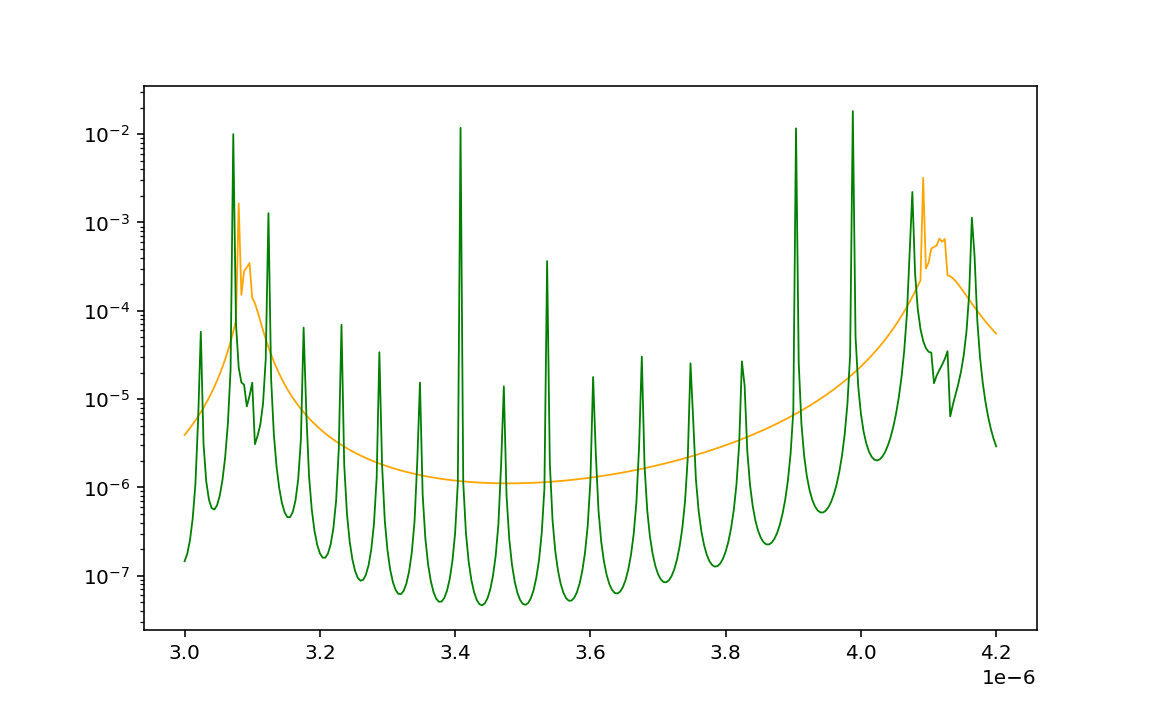

In [372]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betasN2.imag, color='orange', linewidth=.9)
plt.plot(wls, -betasN3.imag, color='green', linewidth=.9)
plt.yscale('log')


# With avg loss from refindx site of PVC

In [380]:
n = 300
betas1 = np.zeros_like(wls, dtype=complex)

n_air = 1.00027717
n_glass = 1.4388164768221814
n_poly = 1.5 - 0.00611j

In [381]:
ts = [59.5e-6, 6e-6, 38.675e-6, 30.6e-6, 60e-6, 25.5e-6]
ns = [lambda x:n_air, lambda x:n_glass,
      lambda x:n_air, lambda x:n_glass,
      lambda x:n_poly, lambda x:n_air]

mats = ['air','glass','air','glass','polymer','air']
maxhs = [.2, .01, .2, .01, .01, 10]
scale = 59.5e-6


Having a hard time getting the fundamental, it's jumping to a higher order mode, let's look where it is.

In [382]:
A = BraggExact(ts=ts, ns=ns , mats=mats, maxhs=maxhs, wl=wls[0], scale=scale,
              no_mesh=True)

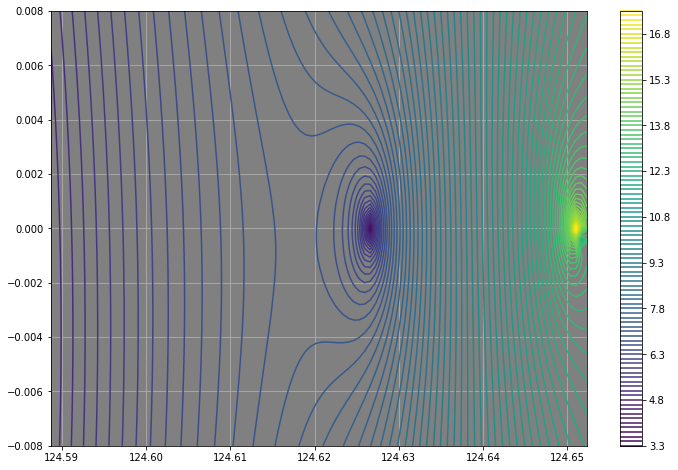

In [383]:
%matplotlib inline
k_low = A.ks[0].real * A.scale

plotlogf(A.determinant, .9995*k_low, 1.00001*k_low, -.008,.008, nu, outer,
         iref=100, rref=100, levels=100)

Lower than I thought, okay

In [384]:
guess = np.array(.9998*k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer, Ktype), tol = 1e-16)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer, Ktype)))


Scaled beta:  (124.6266043307464-4.220279628473641e-06j) . Residual of determinant:  6.192701960060449e-10


In [385]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
    
    A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=wl, scale=scale,
                  no_mesh=True)
    k_low = A.ks[0] * A.scale
    guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999995
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999995
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas1[i] = beta
    

     --------------------  1/301: wavelength: 3e-06  --------------------     

Scaled beta:  (124.62660433074642-4.220279628428212e-06j) . Residual of determinant:  6.215553886584528e-09 


     --------------------  2/301: wavelength: 3.004e-06  --------------------     

Scaled beta:  (124.46052875826041-4.046227534038981e-06j) . Residual of determinant:  1.3732325318048576e-09 


     --------------------  3/301: wavelength: 3.0080000000000003e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (124.29488899305625-3.9795456068800454e-06j) . Residual of determinant:  4.715253248914884e-11 


     --------------------  4/301: wavelength: 3.012e-06  --------------------     

Scaled beta:  (124.12968261375771-4.109467243248392e-06j) . Residual of determinant:  1.3665017960246723e-09 


     --------------------  5/301: wavelength: 3.016e-06  --------------------     

Scaled beta:  (123.96490705786377-4.501977011973939e-06j) . Residual of d

scaling guess: 1
scaling guess: 2
Scaled beta:  (119.37752329268586-3.399950757018961e-05j) . Residual of determinant:  7.195306517042507e-10 


     --------------------  35/301: wavelength: 3.136e-06  --------------------     

Scaled beta:  (119.22480356390976-2.8896106273747316e-05j) . Residual of determinant:  2.9354977299748974e-10 


     --------------------  36/301: wavelength: 3.14e-06  --------------------     

Scaled beta:  (119.07253894400976-2.297464171921444e-05j) . Residual of determinant:  2.6028894463635325e-10 


     --------------------  37/301: wavelength: 3.144e-06  --------------------     

scaling guess: 1
Scaled beta:  (118.92071161161253-1.7610397221399168e-05j) . Residual of determinant:  2.049902860108953e-09 


     --------------------  38/301: wavelength: 3.148e-06  --------------------     

Scaled beta:  (118.76930930791562-1.3536371338272359e-05j) . Residual of determinant:  8.728554919064132e-10 


     --------------------  39/301: wavelength: 3.1

Scaled beta:  (113.70803781299666-2.4233656144333615e-06j) . Residual of determinant:  3.831112818179568e-09 


     --------------------  74/301: wavelength: 3.292e-06  --------------------     

scaling guess: 1
Scaled beta:  (113.56979497985012-2.409850544492184e-06j) . Residual of determinant:  2.4033059765703776e-09 


     --------------------  75/301: wavelength: 3.296e-06  --------------------     

Scaled beta:  (113.4318881231189-2.2217976139726426e-06j) . Residual of determinant:  3.92852265464656e-09 


     --------------------  76/301: wavelength: 3.2999999999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (113.29431589744638-1.9406375817042896e-06j) . Residual of determinant:  1.918278934446438e-09 


     --------------------  77/301: wavelength: 3.304e-06  --------------------     

scaling guess: 1
Scaled beta:  (113.15707705409193-1.6630608771091377e-06j) . Residual of determinant:  2.0425826576549157e-09 


     --------------------  78/301: wa

Scaled beta:  (108.4286586892266-1.035761788535633e-06j) . Residual of determinant:  7.884509184361413e-09 


     --------------------  114/301: wavelength: 3.452e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
Scaled beta:  (108.30294569856177-1.1724470818483848e-06j) . Residual of determinant:  3.231140669717954e-09 


     --------------------  115/301: wavelength: 3.456e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (108.17752373562513-1.3278371386932298e-06j) . Residual of determinant:  1.9223219951665275e-09 


     --------------------  116/301: wavelength: 3.46e-06  --------------------     

Scaled beta:  (108.05239180394561-1.4626243244627853e-06j) . Residual of determinant:  3.479636544972838e-09 


     --------------------  117/301: wavelength: 3.4639999999999998e-06  --------------------     

Scaled beta:  (107.92754887801425-1.521987625128009e-06j) . Residual of determ

Scaled beta:  (103.96348928093826-1.6766344442213398e-06j) . Residual of determinant:  5.209481336884597e-09 


     --------------------  151/301: wavelength: 3.6e-06  --------------------     

scaling guess: 1
Scaled beta:  (103.84790228305427-1.5232147912121888e-06j) . Residual of determinant:  4.784313004047708e-09 


     --------------------  152/301: wavelength: 3.6039999999999997e-06  --------------------     

scaling guess: 1
Scaled beta:  (103.73257161387832-1.354522448866837e-06j) . Residual of determinant:  3.92122881794834e-09 


     --------------------  153/301: wavelength: 3.608e-06  --------------------     

scaling guess: 1
Scaled beta:  (103.61749643675452-1.2072791657287888e-06j) . Residual of determinant:  2.8440447939033256e-09 


     --------------------  154/301: wavelength: 3.612e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (103.50267592350235-1.096054513142805e-06j) . Residual of determinant:  8.283503520082214e-09 


  

scaling guess: 1
Scaled beta:  (100.06509175789594-2.4991621131789105e-06j) . Residual of determinant:  2.1816122039692596e-10 


     --------------------  186/301: wavelength: 3.7399999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (99.95799296326403-2.2493607684442883e-06j) . Residual of determinant:  3.806303076609045e-09 


     --------------------  187/301: wavelength: 3.744e-06  --------------------     

Scaled beta:  (99.85112256941697-2.0263348595547815e-06j) . Residual of determinant:  5.486140343238731e-09 


     --------------------  188/301: wavelength: 3.748e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (99.74447986943834-1.853495623074025e-06j) . Residual of determinant:  3.129216939632059e-10 


     --------------------  189/301: wavelength: 3.752e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (99.6380641519

scaling guess: 1
scaling guess: 2
Scaled beta:  (96.44787847093389-7.476659010135606e-06j) . Residual of determinant:  6.415421182634926e-10 


     --------------------  221/301: wavelength: 3.88e-06  --------------------     

Scaled beta:  (96.34835334966083-7.1457815997758704e-06j) . Residual of determinant:  7.498146842871567e-11 


     --------------------  222/301: wavelength: 3.8839999999999996e-06  --------------------     

Scaled beta:  (96.24903183662124-6.611404513176341e-06j) . Residual of determinant:  1.95980641529873e-09 


     --------------------  223/301: wavelength: 3.888e-06  --------------------     

scaling guess: 1
Scaled beta:  (96.1499132499976-6.045741347001184e-06j) . Residual of determinant:  8.90514827157473e-10 


     --------------------  224/301: wavelength: 3.891999999999999e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (96.0509969743033-5.555609587992342e-06j) . Residual of determinant:  6.251046581187801e-10 




Scaled beta:  (92.89565878611597-5.0775682729663115e-05j) . Residual of determinant:  1.0062571867293707e-10 


     --------------------  258/301: wavelength: 4.027999999999999e-06  --------------------     

Scaled beta:  (92.80317943873305-5.843864053954538e-05j) . Residual of determinant:  1.4084716008083049e-10 


     --------------------  259/301: wavelength: 4.032e-06  --------------------     

scaling guess: 1
Scaled beta:  (92.71087257517803-6.401058336044986e-05j) . Residual of determinant:  7.096684043403987e-11 


     --------------------  260/301: wavelength: 4.036e-06  --------------------     

Scaled beta:  (92.61873463909102-6.666973062894995e-05j) . Residual of determinant:  1.1147436843226832e-10 


     --------------------  261/301: wavelength: 4.0399999999999994e-06  --------------------     

scaling guess: 1
Scaled beta:  (92.52676173440253-6.678826240237043e-05j) . Residual of determinant:  5.934481684200401e-11 


     --------------------  262/301: wavelen

scaling guess: 1
Scaled beta:  (89.784458004216-8.163513927406198e-05j) . Residual of determinant:  1.2557221124497518e-10 


     --------------------  293/301: wavelength: 4.168e-06  --------------------     

Scaled beta:  (89.69748133056191-7.781961033092833e-05j) . Residual of determinant:  2.4839665952060024e-10 


     --------------------  294/301: wavelength: 4.172e-06  --------------------     

scaling guess: 1
Scaled beta:  (89.61076794740444-7.596314062785573e-05j) . Residual of determinant:  4.624556151015998e-11 


     --------------------  295/301: wavelength: 4.1759999999999995e-06  --------------------     

Scaled beta:  (89.52430090093613-7.582817751121563e-05j) . Residual of determinant:  7.665928973512967e-11 


     --------------------  296/301: wavelength: 4.18e-06  --------------------     

Scaled beta:  (89.43806678230233-7.718155915942097e-05j) . Residual of determinant:  3.673753319868557e-12 


     --------------------  297/301: wavelength: 4.1839999999

<IPython.core.display.Javascript object>


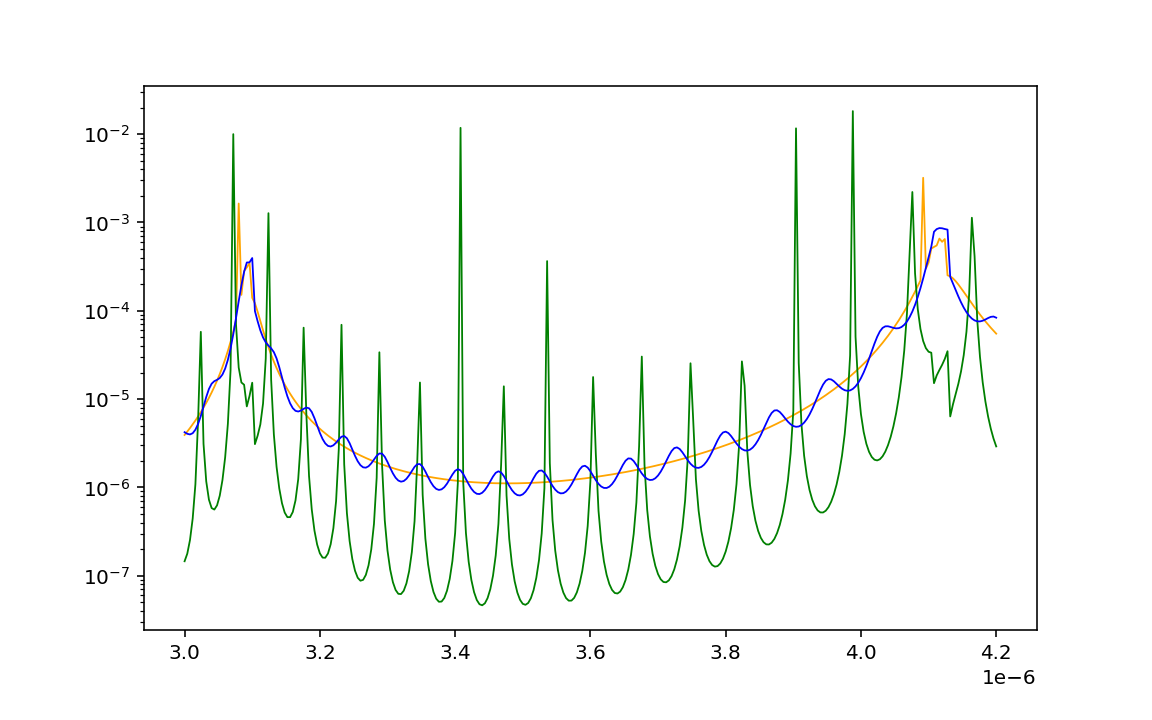

In [386]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betasN2.imag, color='orange', linewidth=.9)
plt.plot(wls, -betasN3.imag, color='green', linewidth=.9)
plt.plot(wls, -betas1.imag, color='blue', linewidth=.9)
plt.yscale('log')
